# Sentiment Analysis on review text from book dataset

In [1]:
import pandas as pd
from nltk.sentiment.vader import 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_book = pd.read_csv('integrated_data.csv')

In [3]:
df_book.head()

,Unnamed: 0,book_id,average_rating,description,title,language_code,genre,user_id,rating,review_text,int_user_id
0,0,13571772,4.28,The questions plaguing Captain America's dream...,Captain America: Winter Soldier (The Ultimate ...,eng,comics,568ce0dddc00192a814476ab5441acbb,3,It's an o.k. story. Much better than some othe...,110859
1,1,13571772,4.28,The questions plaguing Captain America's dream...,Captain America: Winter Soldier (The Ultimate ...,eng,comics,ae681bb05174eaa3d2124d51262b76ad,3,A Captain America story involving a Russian as...,223541
2,2,13571772,4.28,The questions plaguing Captain America's dream...,Captain America: Winter Soldier (The Ultimate ...,eng,comics,396fe0f07a53ad6be40e232c28a35e18,4,I read this in order to prepare myself for the...,73500
3,3,35452242,4.05,The fight for Jason Delgado's life and soul be...,Bounty Hunter 4/3: My Life in Combat from Mari...,eng,comics,1c0124b7ccfd549911ad5c8741d95765,5,Bounty Hunter 4\3 is a in- depth personal stor...,35836
4,4,707611,4.06,These are the stories that catapulted Superman...,"Superman Archives, Vol. 2",en-US,comics,79423049f862e94f1022f736a3c22cc1,3,action 80,155564


In [4]:
# Creating a dataframe with the required columns
cols = ['user_id', 'title', 'review_text', 'rating']
df_senti = df_book[cols]

In [5]:
df_senti.head()

,user_id,title,review_text,rating
0,568ce0dddc00192a814476ab5441acbb,Captain America: Winter Soldier (The Ultimate ...,It's an o.k. story. Much better than some othe...,3
1,ae681bb05174eaa3d2124d51262b76ad,Captain America: Winter Soldier (The Ultimate ...,A Captain America story involving a Russian as...,3
2,396fe0f07a53ad6be40e232c28a35e18,Captain America: Winter Soldier (The Ultimate ...,I read this in order to prepare myself for the...,4
3,1c0124b7ccfd549911ad5c8741d95765,Bounty Hunter 4/3: My Life in Combat from Mari...,Bounty Hunter 4\3 is a in- depth personal stor...,5
4,79423049f862e94f1022f736a3c22cc1,"Superman Archives, Vol. 2",action 80,3


In [6]:
df_senti.shape

(7567357, 4)

In [7]:
df_senti['review_text'].nunique()

6624119

In [8]:
# Checking if there are any null values in the 'review_text' column
df_senti['review_text'].isna().sum()

4621

We cannot extract anything from the records without review text, hence dropping them.

In [9]:
# Dropping the records with null values
df_sent_final = df_senti.dropna()

In [10]:
# There are no nulls now
df_sent_final.isna().any()

user_id        False
title          False
review_text    False
rating         False
dtype: bool

In [11]:
# Sampling the dataset to get better results
df_sent_final = df_sent_final.sample(frac = 0.1, replace = False, random_state=42)


In [12]:
df_sent_final.shape


(7562736, 4)


In [13]:
# adding columns indicating sentiments

senti = SentimentIntensityAnalyzer()
df_sent_final["sentiments"] = df_sent_final["review_text"].apply(lambda x: senti.polarity_scores(x))
df_sent_final = pd.concat([df_sent_final.drop(['sentiments'], axis=1), df_sent_final['sentiments'].apply(pd.Series)], axis=1)

From this we can say that the review test is highly biased towards positivity. Users mostly add reviews when they have appreciation for the book. About 87% of the data is positively rated.

In [14]:
# adding a column to differentiate good and bad ratings
df_sent_final["bad_review"] = df_sent_final["rating"].apply(lambda x: 1 if x < 2.5 else 0)
df_sent_final["bad_review"].value_counts(normalize = True)

0    0.8773
1    0.1227
Name: bad_review, dtype: float64

In [15]:
df_sent_final.head()

,user_id,title,review_text,rating,neg,neu,pos,compound,bad_review
5631782,9d91a5ba82987dab0952ca0002d00b1a,"Dirty Secret (The Burke Brothers, #1)",**ARC provided by author in exchange for a hon...,0,0.117,0.751,0.132,0.9622,1
1017171,ad913b59862f652991ce31369eb2b42e,"Dark Celebration (Dark, #14)","It was a good book, not as good as the others,...",5,0.000,0.563,0.437,0.7750,0
7069314,0fa7aa9585a49f9a8348797513c8f2fa,"Hanover House (The Evelyn Talbot Chronicles, #...",I have often shied away from romantic suspense...,4,0.115,0.693,0.192,0.9867,0
5780195,68ecf15ce1d71b301f5e6a203dd15876,Off Base,I loved both parts of Off Base! Tessa Bailey a...,5,0.000,0.524,0.476,0.9595,0
7102133,bb3d9ae14ce8f776874bc390670c22bf,Night Film,Overall I really enjoyed this book. Mostly bec...,3,0.136,0.734,0.130,-0.2268,0


In [16]:
# add number of characters column
df_sent_final["nb_chars"] = df_sent_final["review_text"].apply(lambda x: len(x))

# add number of words column
df_sent_final["nb_words"] = df_sent_final["review_text"].apply(lambda x: len(x.split(" ")))

In [17]:
df_sent_final.head()

,user_id,title,review_text,rating,neg,neu,pos,compound,bad_review,nb_chars,nb_words
5631782,9d91a5ba82987dab0952ca0002d00b1a,"Dirty Secret (The Burke Brothers, #1)",**ARC provided by author in exchange for a hon...,0,0.117,0.751,0.132,0.9622,1,4138,779
1017171,ad913b59862f652991ce31369eb2b42e,"Dark Celebration (Dark, #14)","It was a good book, not as good as the others,...",5,0.000,0.563,0.437,0.7750,0,62,14
7069314,0fa7aa9585a49f9a8348797513c8f2fa,"Hanover House (The Evelyn Talbot Chronicles, #...",I have often shied away from romantic suspense...,4,0.115,0.693,0.192,0.9867,0,2145,399
5780195,68ecf15ce1d71b301f5e6a203dd15876,Off Base,I loved both parts of Off Base! Tessa Bailey a...,5,0.000,0.524,0.476,0.9595,0,159,27
7102133,bb3d9ae14ce8f776874bc390670c22bf,Night Film,Overall I really enjoyed this book. Mostly bec...,3,0.136,0.734,0.130,-0.2268,0,648,125


In [18]:
# add tf-idfs columns

tfidf = TfidfVectorizer(min_df = 10) # ignoring terms repeated for more than 10 times
tfidf_result = tfidf.fit_transform(df_sent_final["review_text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df_sent_final.index
df_sent_final = pd.concat([df_sent_final, tfidf_df], axis=1)

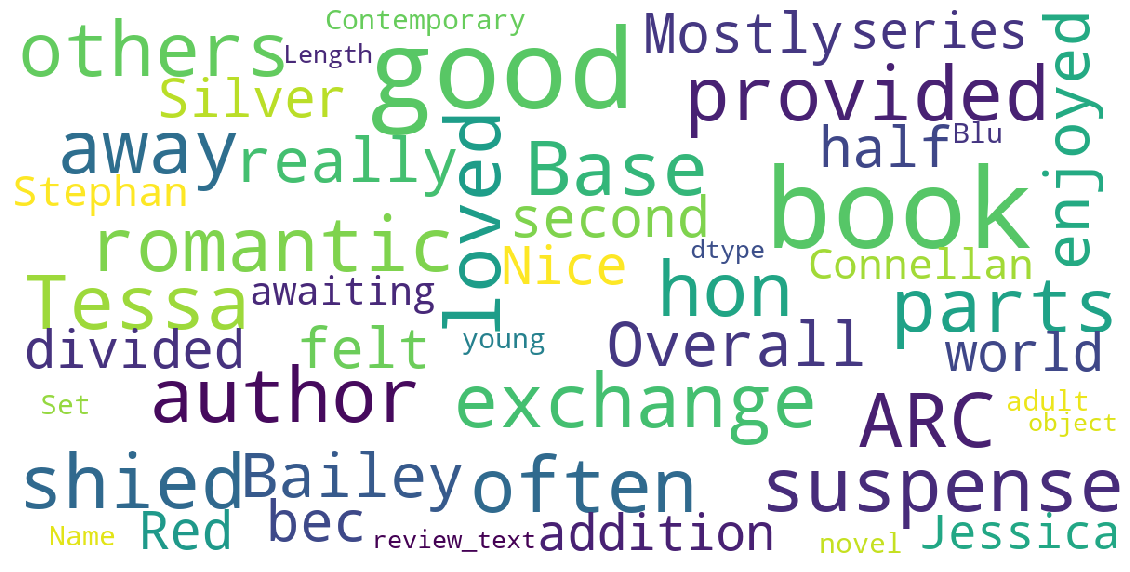

In [19]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_sent_final['review_text'])

In [20]:
plt.savefig('wordcloud.png')

<Figure size 432x288 with 0 Axes>

**Reference**

https://towardsdatascience.com/sentiment-analysis-for-hotel-reviews-3fa0c287d82e
https://ieeexplore.ieee.org/abstract/document/8769589